In [1]:
import os
import sys

# Data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn utility classes & functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Scikit Learn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), '../'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from src.data.fitzroy_data import fr_match_data
from src.model.metrics import measure_estimators, regression_accuracy

np.random.seed(42)

In [2]:
match_df = fr_match_data()
match_df

/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


team  score        oppo_team  \
team       year   round_number                                       
Adelaide   1991.0 2               Adelaide     81          Carlton   
                  3               Adelaide    132           Sydney   
                  4               Adelaide     47         Essendon   
                  5               Adelaide     65       West Coast   
                  6               Adelaide    128        Footscray   
                  7               Adelaide     31         St Kilda   
                  9               Adelaide    118  North Melbourne   
                  10              Adelaide    106        Melbourne   
                  11              Adelaide     93          Geelong   
                  12              Adelaide     50          Fitzroy   
                  13              Adelaide     85         Richmond   
                  14              Adelaide    156   Brisbane Lions   
                  16              Adelaide     95         Hawthorn   
                  17              Adelaide     55          Carlton   
                  18              Adelaide    118           Sydney   
                  19              Adelaide    108         Essendon   
                  20              Adelaide     80       West Coast   
                  21              Adelaide     40        Footscray   
                  22              Adelaide     81         St Kilda   
                  24              Adelaide    180  North Melbourne   
           1992.0 1               Adelaide     87        Footscray   
                  3               Adelaide    104        Melbourne   
                  4               Adelaide     97          Fitzroy   
                  5               Adelaide    151         Richmond   
                  6               Adelaide    134   Brisbane Lions   
                  7               Adelaide     65         St Kilda   
                  8               Adelaide     87          Geelong   
                  9               Adelaide     64      Collingwood   
                  10              Adelaide     78       West Coast   
                  11              Adelaide    142  North Melbourne   
...                                    ...    ...              ...   
West Coast 2017.0 20            West Coast     95         St Kilda   
                  21            West Coast    100          Carlton   
                  22            West Coast     60              GWS   
                  23            West Coast    100         Adelaide   
                  24            West Coast     78    Port Adelaide   
                  25            West Coast     58              GWS   
           2018.0 1             West Coast     86           Sydney   
                  2             West Coast    121        Footscray   
                  3             West Coast     95          Geelong   
                  4             West Coast    139       Gold Coast   
                  5             West Coast     79          Carlton   
                  6             West Coast     89        Fremantle   
                  7             West Coast    102    Port Adelaide   
                  8             West Coast     86              GWS   
                  9             West Coast    130         Richmond   
                  10            West Coast     75         Hawthorn   
                  11            West Coast    101         St Kilda   
                  13            West Coast     57           Sydney   
                  14            West Coast     52         Essendon   
                  16            West Coast     86              GWS   
                  17            West Coast    102      Collingwood   
                  18            West Coast    100        Footscray   
                  19            West Coast     41  North Melbourne   
                  20            West Coast    142        Fremantle   
                  21            West Coast     6

In [4]:
# Set up & split data for models

match_features = pd.get_dummies(match_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
match_labels = pd.Series(match_df['score'] - match_df['oppo_score'], name='score_diff')
data = train_test_split(match_features, match_labels)

In [5]:
# Pass data to models & measure performance

estimators = (Lasso(),
              ElasticNet(),
              Ridge(),
              LinearSVR(),
              AdaBoostRegressor(n_estimators=100),
              BaggingRegressor(),
              ExtraTreesRegressor(n_estimators=100),
              GradientBoostingRegressor(),
              RandomForestRegressor(n_estimators=100),
              SVR(kernel='rbf', gamma='auto'),
              XGBRegressor())

estimator_scores = measure_estimators(estimators, data, model_type='regression')
estimator_scores

,estimator,accuracy,error,std_accuracy,std_error,score_type
0,Lasso,0.697792,27.340796,0.002314,0.274651,cv
1,ElasticNet,0.695050,27.513464,0.003660,0.279142,cv
2,Ridge,0.697747,27.188336,0.005106,0.256244,cv
3,LinearSVR,0.698067,27.206537,0.004115,0.264534,cv
4,AdaBoostRegressor,0.689291,27.922261,0.005454,0.157232,cv
5,BaggingRegressor,0.677591,28.560558,0.009571,0.258602,cv
6,ExtraTreesRegressor,0.693359,27.467205,0.003284,0.260492,cv
7,GradientBoostingRegressor,0.699621,26.995846,0.004489,0.299667,cv
8,RandomForestRegressor,0.693633,27.327541,0.002467,0.288762,cv
9,SVR,0.697335,27.746322,0.005424,0.270679,cv


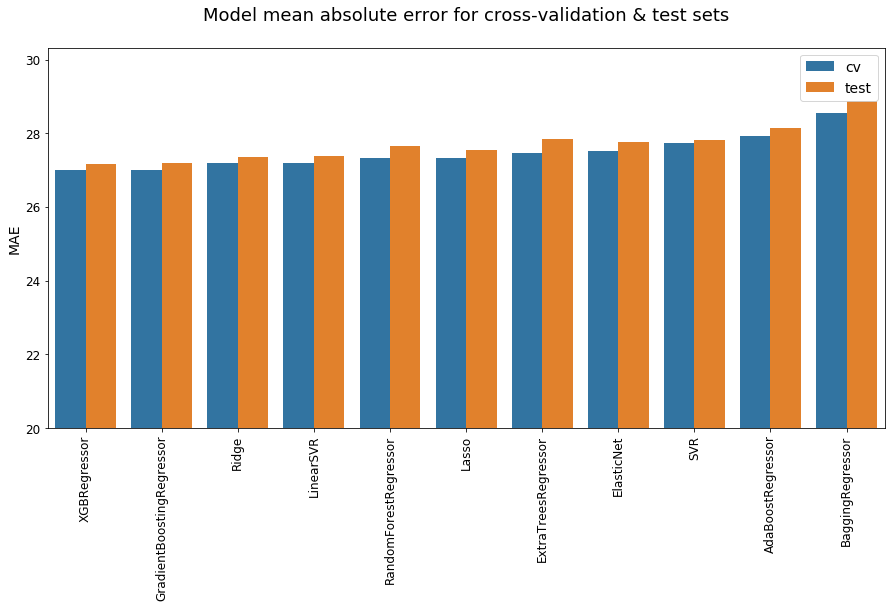

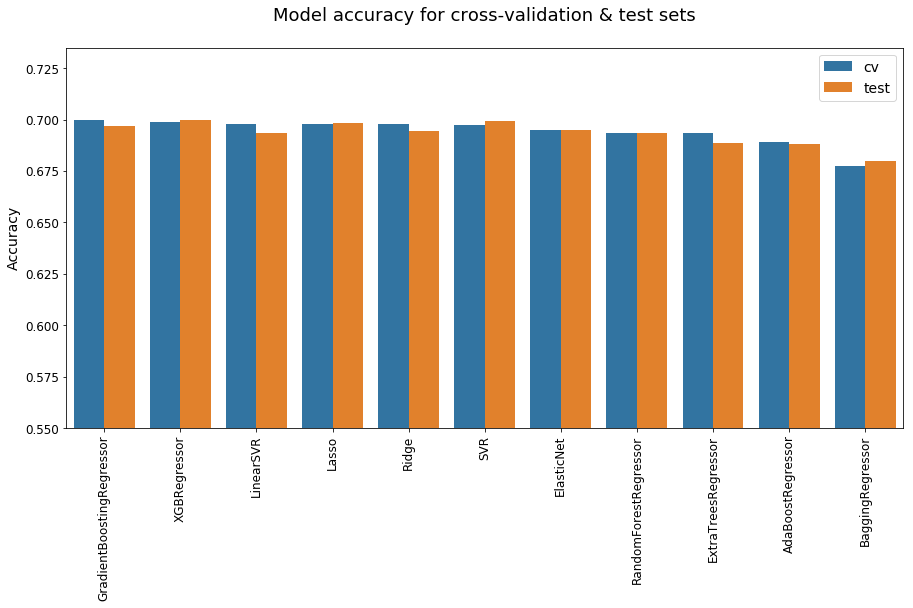

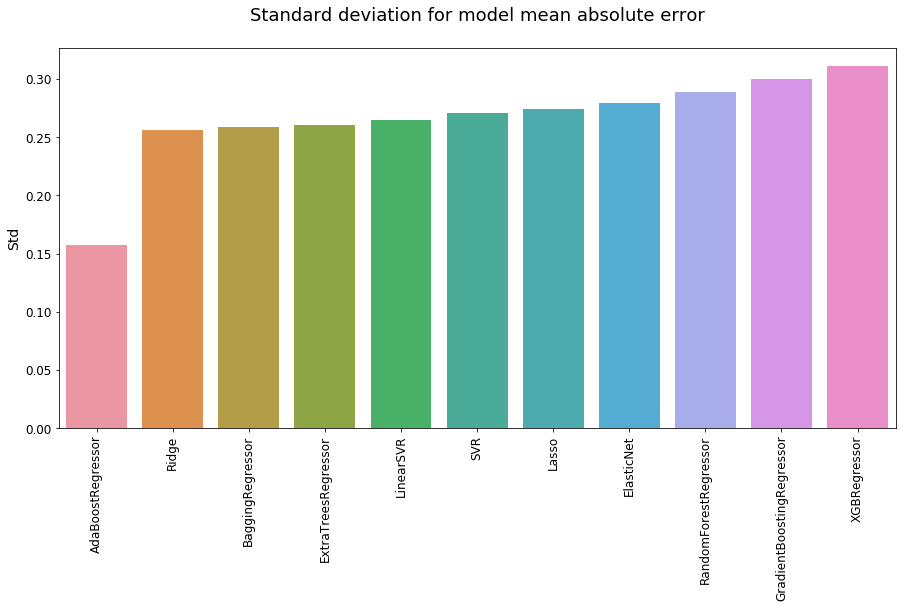

In [6]:
# MAE scores
mae_scores = estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
acc_scores = estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
std_scores = mae_scores[mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=std_scores)
# plt.ylim(bottom=0.55)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
# plt.legend(fontsize=14)

plt.show()

In [7]:
xgb = make_pipeline(StandardScaler(), XGBRegressor())
gb = make_pipeline(StandardScaler(), GradientBoostingRegressor())
ridge = make_pipeline(StandardScaler(), Ridge())

estimators = (xgb, gb, ridge)

model_names = []
errors = []
accuracies = []
years = []

for year in range(2011, 2017):
    X_train = match_features[match_features['year'] < year]
    X_test = match_features[match_features['year'] == year]
    y_train = match_labels.loc[X_train.index]
    y_test = match_labels.loc[X_test.index]
    
    for estimator in estimators:
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        years.append(year)
        model_names.append(estimator.steps[-1][0])
        errors.append(mean_absolute_error(y_test, y_pred))
        accuracies.append(regression_accuracy(y_test, y_pred))
        
year_scores = pd.DataFrame({'model': model_names,
                            'year': years,
                            'error': errors,
                            'accuracy': accuracies}).astype({'year': int})
year_scores

,model,year,error,accuracy
0,xgbregressor,2011,32.458488,0.708556
1,gradientboostingregressor,2011,32.536471,0.719251
2,ridge,2011,31.478839,0.740642
3,xgbregressor,2012,30.526475,0.725888
4,gradientboostingregressor,2012,30.532475,0.725888
5,ridge,2012,31.449842,0.725888
6,xgbregressor,2013,28.662412,0.694444
7,gradientboostingregressor,2013,28.598173,0.691919
8,ridge,2013,29.168987,0.691919
9,xgbregressor,2014,31.557178,0.696970


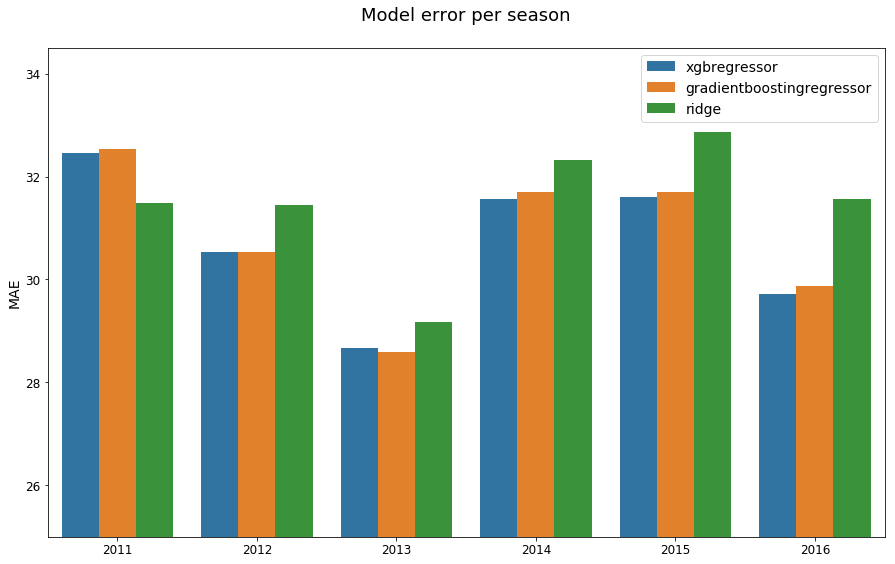

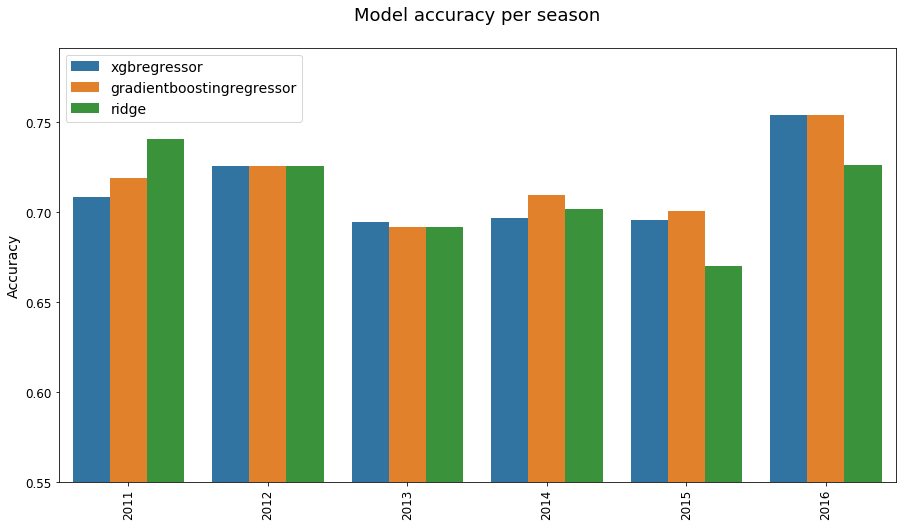

In [8]:
# MAE scores
plt.figure(figsize=(15, 9))
sns.barplot(x='year', y='error', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=25)
plt.title('Model error per season\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
plt.figure(figsize=(15, 8))
sns.barplot(x='year', y='accuracy', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.55)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

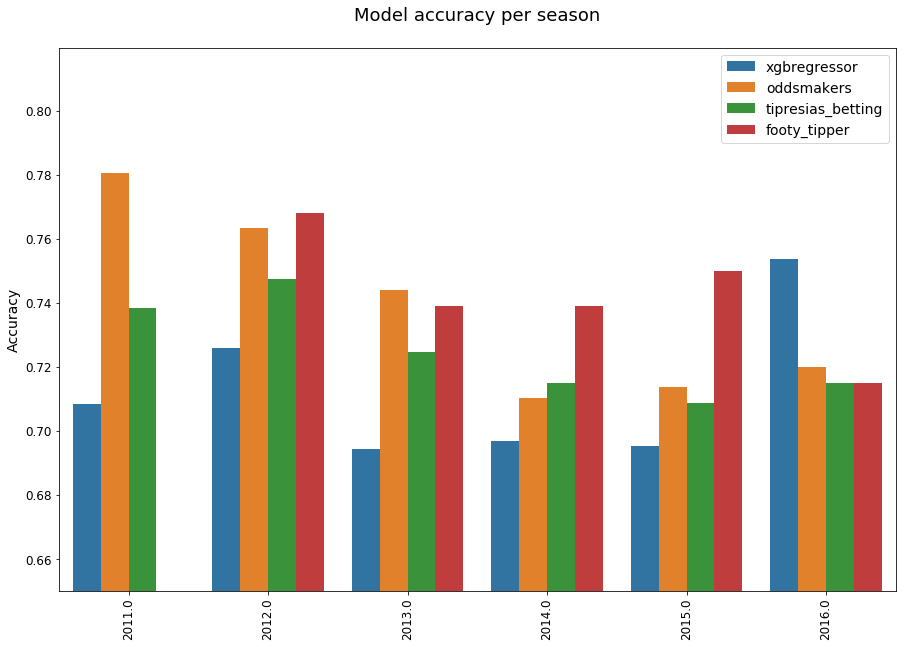

In [9]:
prediction_df = pd.read_csv('../data/model_predictions.csv')
prediction_scores = (prediction_df
                     .groupby(['model', 'year'])
                     .mean()['tip_point']
                     .reset_index()
                     .rename(columns={'tip_point': 'accuracy'}))
# Footy tipper accuracy scores taken from a trial that took too long to run,
# so I'm just copy pasting from a notebook
footy_tipper_scores = pd.DataFrame({'model': ['footy_tipper'] * len(range(2012, 2017)),
                                    'year': list(range(2012, 2017)),
                                    'error': [0] * len(range(2012, 2017)),
                                    'accuracy': [0.768116, 0.739130, 0.739130, 0.750000, 0.714976]})

all_year_scores = (pd
                   .concat([year_scores[year_scores['model'] == 'xgbregressor'],
                            prediction_scores, footy_tipper_scores],
                           sort=True)
                   .reset_index(drop=True))

# Accuracy scores
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='accuracy', hue='model', data=all_year_scores[all_year_scores['year'] > 2010])
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.65)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()